# MEDIDAS DE DISPERSÃO 
### Entendendo um pouco mais sobre como funciona o grau de variabilidade
---
> Abordagem feita com base no livro de Fonseca e Martins: **curso de estatística -** *6° Edição* 
> Páginas 141 - 151


Denomina-se medidas de dispersão como uma ferramenta usada para avaliar o grgau de variablidade ou dispersão dos valores em torno da média. Eles servem para que possamos medir a representatividade da média.

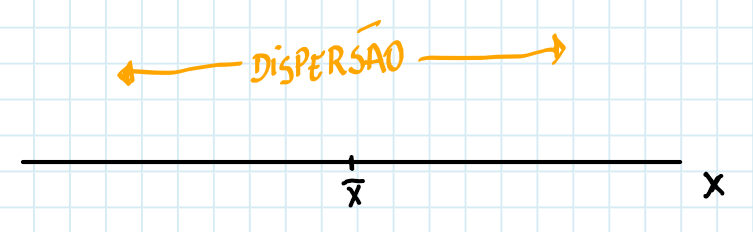

Dentre as medidas de dispersão temos, então:
* Amplitude Total
* Desvio Médio
* Variância
* Desvio-Padrão
* Coeficiente de Variação


 ## Amplitude Total
 
A amplitude total é a diferença entre o maior e o menor dos valores da Série. Em python, por exemplo, poderiamos aplicar um max ou min para saber qual o maior e menor valor contido em uma Lista. Sua fórmula é:

\begin{equation}
R = X_{max} - X_{min}
\end{equation}

In [6]:
#Um simples exemplo em uma linguagem de programação seria:

lista = [10,15,45,89,16,78]
max_v = max(lista)
min_v = min(lista)
print(f"Maior valor: {max_v}\t Menor valor: {min_v}")
print(f"Amplitude Total: {max_v - min_v} ")

Maior valor: 89	 Menor valor: 10
Amplitude Total: 79 


A amplitude é muito limitada, pois sendo uma medida que depende apenas de valroes externos, é instável, não sendo afetada pela dispersão dos valores internos.

## Desvio Médio

Desde que se deseja medir a dispersão os dados em relação a média, parece interessante a análise dos desvios em torno da média. Isto é, analisar os desvios:

\begin{equation}
d_i = \big( x_i - \overline{x} \big)
\end{equation}

Contudo, a soma de todos desvios é igual a zero. Logo, é necessário encontrar uma forma de trabalhar com desvios sem que a soma resulte em zero. Logo, define-se o desvio médio desta maneira:


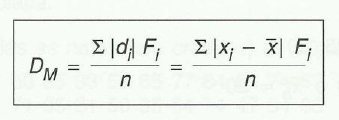

Os desvios foram considerados em módulo, evitando-se assim que a soma fique nula.

Na internet podemos encontrar isso também

<img src="http://4.bp.blogspot.com/-M4uvcCs9IAA/UmMLk_wpiWI/AAAAAAAAAEw/Z5qx2-paAUc/s1600/desvio.jpg" width='200px'>

Em python, para uma lista da qual os valores se repetem, gerando então aquela frequencia $F_i$ que vemos em estatística, podemos aplicar esta função:

In [64]:
def desvio_medio(x):
    media = sum(x)/len(x) #descubrir a media
    somatorio = sum([abs(xi - media) for xi in x]) #realizar a subtração de cada item pela media e
                                                   #tira seu absoluto para usar no somatorio
    dm = somatorio/len(x)
    return dm

Diferente das questões de livros onde temos uma tabela dizend as frequencias das quais um valor aparece, em dataset de verdade, os valores estarão explicitamente repetidos, nao necessitando criar uma variavel para contar cada um, mas é claro, sempre pode haver um caso especial, mas no geral isso ai ja funciona :)

## Variância

Neste caso consideramos a formula dos desvios ao quadrado $\big( X_i - \overline{X} \big)^2$, evitando que $\Sigma d_i = 0$. Assim, a definição da variância populacional é dada como :

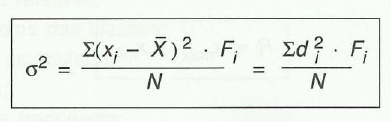

* $\sigma^2$ indica variância populacional e lê-se : *sigma ao quadrado*
* $\overline{x}$ da fórmula é a média da população

Agora, se estamos trabalhando com amostras, temos a seguinte fórmula:

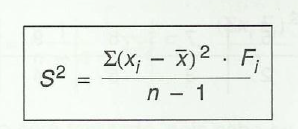

As diferenças entre uma fórmula e outra, como bem indica o livro são que:
> Para o caso da variância populacional $\sigma^2$, usamos a média populacional($\overline{X}$) tendo como denominador o tamanho da população $N$. Para o calculo da variânca amostral, usamos S$^2$, alem da média amostral ($\overline{x}$), tendo como denominador o tamanho da amostra menos um, ou seja, $N - 1$.

Parece coisa boba para nós que estamos aprendendo, uma letra minúscula e tals, mas observe que uma singela letra indica que tal fórmula tem uma finalidade diferente da outra e seu uso sem conhecimento em um projeto de análise de dados, pode ser prejudicial.

Em python, teremos isso, caso tentemos fazer na unha, seguindo o livro Data Science do Zero, temos mais ou menos isso (USAREMOS A VARIÂNCIA PARA POPULAÇÃO):

<img src="https://voceconcursado.com.br/wp-content/uploads/2018/09/var.jpg"  width='390px' >

In [80]:
#primeiro criamos uma função para calcular a média
def media(valor):
    return sum(valor)/len(valor) #somatorio dos valores / quantidade de valores


#calcularemos então cada parte de maneira separada e no fim as dividimos:
def primeira_parte(x):
        x_cima = media(x)
        return [(x_i - x_cima)**2 for x_i in x] # pra cada valor da lista, diminuir
                                                # pelo valor da media
                                                # Ja aproveito também para elevar cada resultado ao quadrado
        
#agora so preciso recebe a parte de cima, realizar um somatorio de seus resultados e dividir pela quantidade de elementos
def variancia(x):
    res_cima = sum(primeira_parte(x))
    N = len(x)
    return res_cima/(N)
    

Nossa função então tem a seguite saída, uma vez aplicada na lista criada lá em cima

In [81]:
variancia(lista)

990.4722222222223

Agora a gente compara e vê se isso bate com o que o numpy fez

In [15]:
import numpy as np
np.var(lista)

990.4722222222223

Se você quiser calcular para amostras, mude o valor de N, para N-1 por exemplo e já verá mudanças, além de realizar a operação de média amostral.

## Desvio Padrão

Observando a formula da variância, vemos que temos a soma de quadrados (mas hein? aonde? *Alí no* $(X_i - \overline{X})^2 + (X_{i+1} - \overline{X})^2 ... (X_{i+n} - \overline{X})^2$). <br>
Pois é, assim, se em uma questão estivéssemos mexendo com a unidade Metros, o resultado seria em  $M^2$. Para que a gente tivesse uma resposta a unidade Metros apenas, basta aplicar uma raíz quadrada. No python, só teríamos que aplicar isso:

In [75]:
import math #importar a biblioteca math nativa do python

def desvio_padrao(x):
    res_cima = sum(primeira_parte(x))
    N = len(x)
    return math.sqrt(res_cima/(N)) #aplicar o metodo da classe math, sqrt (raiz quadrada)


In [21]:
desvio_padrao(lista)

31.47176865417993

In [23]:
np.std(lista) #comparando com o numpy :)

31.47176865417993

Peguemos um exemplo do livro :

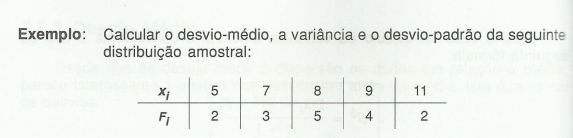


In [85]:
#Calcular o desvio medio,variancia e desvio padrao

l = [5,5,7,7,7,8,8,8,8,8,9,9,9,9,11,11] #essa é a lista. Observe que repetimos a frequencia igual aparece em Fi

#Primeiro calculemos o desvio medio
d_medio = desvio_medio(l)

#variancia agora
var = variancia(l)

#E o desvio padrao
d_padrao = desvio_padrao(l)

print(f"A resposta é:\nDESVIO MEDIO: {d_medio:.2f}\nVARIANCIA: {var:.2f}\nDESVIO PADRÃO: {d_padrao:.2f}")

A resposta é:
DESVIO MEDIO: 1.20
VARIANCIA: 2.68
DESVIO PADRÃO: 1.64


## Coeficiente de Variação

Trata-se de uma medida relativa de dispersão útil para a comparação em termos relativos a grau de concentração em torno da média de séries distintas. É dado por:
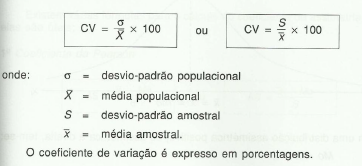

In [89]:
#em python seria isso (para populacional)

def coef_var(x):
    dev_padrao = desvio_padrao(x)
    med = media(x)
    return (dev_padrao/med)*100

In [92]:
coef_var(l)

0.2031836034431187

Usando um exemplo do livro, fica mais fácil de entender:

**Exemplo** Numa empresa, o salário medio dos homens é de 4000.00 REAIS com desvio padrão de 1500.00 REAIS e o das mulheres é em média de 3000.00 REAIS com o desvio padrão de 1200.00 REAIS. então:


In [93]:
#para homens
desvio_padrao = 1500
salario_h = 4000
homens = (desvio_padrao/salario_h)*100

#para mulheres
desvio_padrao = 1200
salario_h = 3000
mulheres = (desvio_padrao/salario_h)*100


print(homens, mulheres)

37.5 40.0


Logo podemos concluir que os salários das mulheres apresenta maior dispersão relativa que o dos homens.
<br>
Dizemos que a distribuição possui pequena variabilidade (dispersão) quando o coeficiente der até 10%. Média dispersão Quando estiver acima de 10% até 20%. Grande dispersão: acima de 20%; Alguns outros autores consideram assim:

* BAIXA DISPERSÃO: CV <= 15%
* MEDIA DISPERSÃO: 15% < CV < 15%
* ALTA DISPERSÃO: CV >= 30%


Com base nessa abordagem, já temos conhecimento de algumas ferramentas para analisarmos as disperções realizadas em um conjunto de dados, podendo aplicar perfeitamente um dataset, bastando adaptar o que for necessário. Não esqueça de ir realizando plotagens visuais para ir entendendo mais ainda. Até o próximo estudo !!!